In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
from BACKEND.Particula import Particula
from BACKEND.Interseccion import Interseccion
from BACKEND.Calle import Calle
from BACKEND.Calles import Calles

ModuleNotFoundError: No module named 'Interseccion'

**Proceso:**
- Una calle y un sentido: Cada partícula avanza con probabilidad p solo si esta despejado.

**Queremos:**
- Función que simule TASEP: recibe probabilidad de avanzar, si es secuencial o paralelo, tamaño de la calle, cantidad inicial de particulas y tasa de generación de particulas.

In [20]:
calles = Calles([Calle([Particula(0,False), Particula(2,False)], direccion=0, intersecciones=[], posicion=3),
                 Calle([Particula(0,False), Particula(2,False)], direccion=0, intersecciones=[], posicion=4),
                 Calle([Particula(0,False), Particula(1,False)], direccion=1, intersecciones=[], posicion=4)])
calles.update_bloqueos()
calles.update_intersecciones()
for calle in calles.calles:
    print(str(calle))
for interseccion in calles.intersecciones:
    print(str(interseccion))


Posición: 0, Bloqueado: False
Posición: 2, Bloqueado: False
Posición: 0, Bloqueado: False
Posición: 2, Bloqueado: False
Posición: 0, Bloqueado: True
Posición: 1, Bloqueado: False
Posición: (3, 4), Bloqueado: [False, False]
Posición: (4, 4), Bloqueado: [False, False]


-------------------
Posición: 7, Bloqueado: False
Posición: 12, Bloqueado: False
Posición: 10, Bloqueado: False
Posición: 12, Bloqueado: False
Posición: (3, 4), Bloqueado: [False, False]
Posición: (4, 4), Bloqueado: [False, False]
-------------------


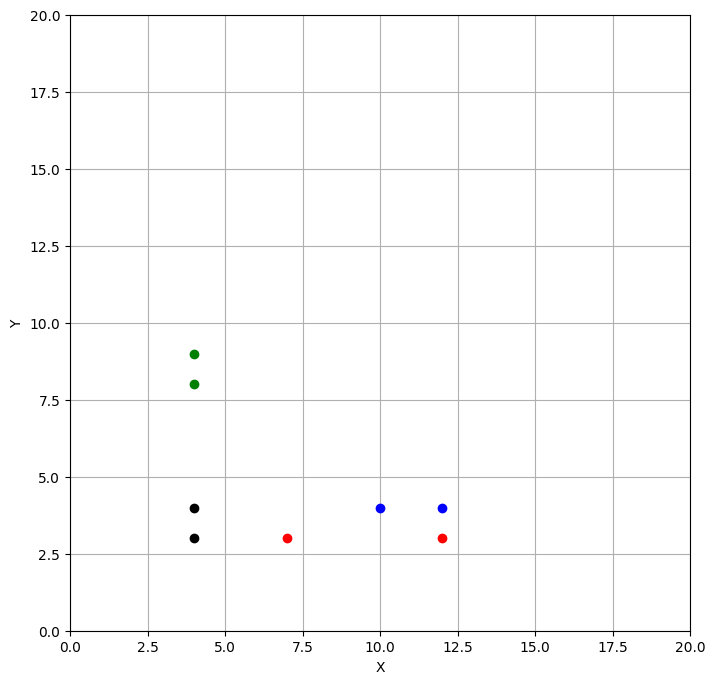

AttributeError: 'Calles' object has no attribute 'delete_particulas_posicion'

In [33]:
calles.update_secuencial(1)
print('-------------------')
print(str(calles.calles[0]))
print(str(calles.calles[1]))
#print(str(calles.calles[2]))
for interseccion in calles.intersecciones:
    print(str(interseccion))
print('-------------------')
calles.plot_2d()
calles.delete_particulas_posicion(8)


In [13]:
calles = Calles([Calle([], direccion=0, intersecciones=[], posicion=3),
                 Calle([], direccion=0, intersecciones=[], posicion=4),
                 Calle([], direccion=1, intersecciones=[], posicion=4)])

In [14]:
import time
def run_simulation(calles):
    id = 0
    while True:
        time.sleep(1)
        particulas_agregadas = calles.agregar_particulas_inicio(id)
        if len(particulas_agregadas) != 0:
            id = particulas_agregadas[-1].id + 1
        diccionario_particulas_agregadas = {}
        for particula in particulas_agregadas:
            direccion = particula.calle.direccion
            if direccion == 0:
                color = 'blue'
                columna = particula.calle.posicion
                fila = particula.posicion
            else:
                color = 'red'
                fila = particula.calle.posicion
                columna = particula.posicion
            diccionario_particulas_agregadas[particula.id] = {'row': fila, 'col': columna, 'color': color, 'id': particula.id}
        calles.update_secuencial(0.5)
        particulas = calles.get_particulas()
        diccionario_particulas = {}
        for particula in particulas:
            direccion = particula.calle.direccion
            if direccion == 0:
                columna = particula.calle.posicion
                fila = particula.posicion
            else:
                fila = particula.calle.posicion
                columna = particula.posicion
            diccionario_particulas[particula.id] = {'id': particula.id, 'new_row': fila, 'new_col': columna}
        yield ({"particulas": diccionario_particulas, "particulas_agregadas": diccionario_particulas_agregadas})

In [15]:
def hola():
    return run_simulation(calles)

In [18]:
hola()

<generator object run_simulation at 0x780a54b20890>